In [134]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error

In [135]:
infra = pd.read_csv("C:/Users/Dell/Desktop/eval_mongodb/crim_gen_1_Data.csv", sep=',')

In [136]:
policier = pd.read_csv("C:/Users/Dell/Desktop/eval_mongodb/crim_plce_1_Data_2.csv")

In [137]:
policier = policier.drop(policier[policier.GEO != 'Turquie'].index)
policier['Value'] = policier['Value'].astype('int64')
policier = policier.drop(columns=['UNIT', 'Flag and Footnotes'])
policier = policier.rename(columns={"Value": "nb_policier"})
policier

,TIME,GEO,nb_policier
35,1998,Turquie,322766
71,1999,Turquie,345033
107,2000,Turquie,347806
143,2001,Turquie,368942
179,2002,Turquie,370095
215,2003,Turquie,318189
251,2004,Turquie,327371
287,2005,Turquie,330310
323,2006,Turquie,325738
359,2007,Turquie,329533


In [138]:
infra = infra.drop(infra[infra.GEO != 'Turquie'].index)
infra = infra.drop(infra[infra.ICCS != 'Total'].index)
infra = infra.drop(columns=['UNIT', 'ICCS', 'Flag and Footnotes'])
infra = infra.rename(columns={"Value": "nb_infra"})
infra

,TIME,GEO,nb_infra
190,1998,Turquie,357311.0
385,1999,Turquie,338606.0
580,2000,Turquie,337079.0
775,2001,Turquie,400337.0
970,2002,Turquie,438714.0
1165,2003,Turquie,472153.0
1360,2004,Turquie,507539.0
1555,2005,Turquie,667820.0
1750,2006,Turquie,975118.0
1945,2007,Turquie,970554.0


In [139]:
merge = pd.merge(policier, infra,  how='left', left_on=['TIME','GEO'], right_on = ['TIME','GEO'])
merge

,TIME,GEO,nb_policier,nb_infra
0,1998,Turquie,322766,357311.0
1,1999,Turquie,345033,338606.0
2,2000,Turquie,347806,337079.0
3,2001,Turquie,368942,400337.0
4,2002,Turquie,370095,438714.0
5,2003,Turquie,318189,472153.0
6,2004,Turquie,327371,507539.0
7,2005,Turquie,330310,667820.0
8,2006,Turquie,325738,975118.0
9,2007,Turquie,329533,970554.0


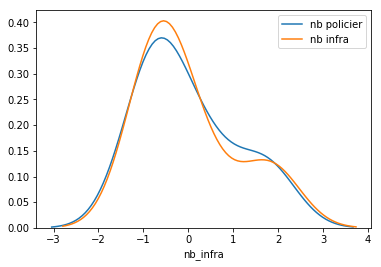

In [147]:
pol_arr = np.array(merge['nb_policier'])
pol_sigma = np.std(pol_arr)
pol_mean = np.mean(pol_arr)
pol_standardized = merge['nb_policier'].apply(lambda x: (x-pol_mean)/pol_sigma)
sns.distplot(pol_standardized,hist = False, label="nb policier")

infra_arr = np.array(merge['nb_infra'])
infra_sigma = np.std(infra_arr)
infra_mean = np.mean(infra_arr)
infra_standardized = merge['nb_infra'].apply(lambda x: (x-infra_mean)/infra_sigma)
sns.distplot(infra_standardized,hist = False, label="nb infra")

plt.show()

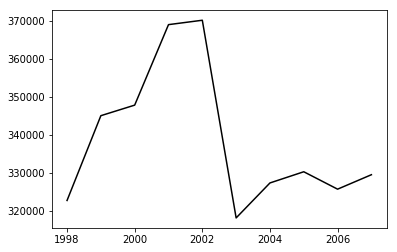

In [148]:
ax1 = plt.plot(policier.TIME,policier.nb_policier, color='black')
plt.show()

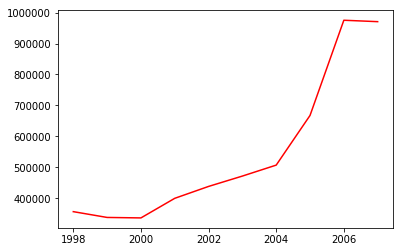

In [133]:
ax2 = plt.plot(infra.TIME, infra.nb_infra, color='red')
plt.show()